# Exploratory Data Analysis

Understanding our data is a crucial step in any data science project. In this assignment, you will perform an exploratory data analysis of corpus of documents. The corpus consists of 11,587 documents, each of which is a news article. The documents are stored in a folder called `data` in the root of the repository and the data is stored in the shared google drive `datasets`.

In this assignment, you will analyze a corpus of news documents to answer the following questions:

0. What is the nature of our data?
    - 0a. What is the size of the corpus?
    - 0b. Are there any duplicates in the corpus? If so, drop them.
    - 0c. Are there any missing values in the corpus?
    - 0d. How many unique documents are there in the corpus?
1. What is the distribution of `token`s per document?
    - 1a. What is the longest article?
    - 1b. What is the shortest article?
    - 1c. What is the 95th percentile of article lengths?
2. How many different sources are there in the corpus?
    - 2a. How many different sources are there in the dataset?
    - 2b. What is the distribution of articles per source?

In [1]:
## Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

tqdm.pandas()

C:\Users\hujej\anaconda3\envs\schoolwork\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## News Corpus

You are provided the following news corpus: `data/news_corpus.csv`. The corpus contains the following columns:

- `index` int: The unique identifier of the document.
- `source` str: The source of the document
- `title` str: The title of the document
- `text` str: The content of the article

The data used in this notebook comes from the [`StoryGraph`](https://archive.org/details/storygraph?tab=about) project, created and maintained by Prof. Alexander Nwala.

```BibTeX
@MISC {nwala-cj20,
    author = {Alexander Nwala and Michele C. Weigle and Michael L. Nelson},
     title = {365 Dots in 2019: Quantifying Attention of News Sources},
     year = {2020},
      month = may,
     howpublished = {Poster/demo accepted at the Computation + Journalism Symposium (symposium cancelled due to COVID-19)},
     arxiv = {https://arxiv.org/abs/2003.09989},
     pubdate = {202005}
}
```

## Load Data into Pandas dataframe

In [2]:
df = pd.read_csv('data/news-2023-02-01.csv')
df.head(-10)

,source,title,text
0,politicususa,Prosecutors Pay Attention: Stormy Daniels Than...,Manhattan prosecutors are likely to notice tha...
1,politicususa,Investigators Push For Access To Trump Staff C...,Print\nInvestigators looking into Donald Trump...
2,politicususa,The End Is Near For George Santos As He Steps ...,The AP reported:\nRepublican Rep. George Santo...
3,politicususa,Rachel Maddow Cuts Trump To The Bone With Stor...,Rachel Maddow showed how Trump committed a cri...
4,vox,Alec Baldwin has been formally charged with in...,Candles are placed in front of a photo of cine...
...,...,...,...
11572,vox,Can you get bird flu? - Vox,"Chickens at a farm in Sheffield, Illinois.\nDa..."
11573,huffpost,Kamala Harris Speaks At Tyre Nichols' Funeral:...,Politics Police Brutality kamala harris Memphi...
11574,msnbc,Tyre Nichols funeral includes anger at Black p...,"By Jarvis DeBerry , MSNBC Opinion Columnist\nA..."
11575,nytimes,"What Fed Rate Increases Mean for Mortgages, Cr...",Continue reading the main story\nWhat Fed Rate...


## 0. What is the nature of our data?

Using your coding skills, answer the following questions. Please comment on your code and results.

In [3]:
## 0a. What is the size of the corpus?
print(df.shape)
missing_values = df.isnull().sum()
print(missing_values)
# The corpus has 11,587 documents. Each document has an associated source, title, and text
# However, 1 is missing a title, and 168 are missing text

(11587, 3)
source      0
title       1
text      168
dtype: int64


In [4]:
## 0b. Are there any duplicates in the corpus? If so, remove or drop them.
duplicates = df.duplicated(subset=['title', 'text'], keep='first').sum()
print(duplicates) #10397 entries either havea  duplicated title, or duplicated text
#maybe duplicate titles is common in news articles? check for unique text
print(df['text'].unique().size) #only 1063 of the articles actually have unique text entries!

#because so many entries have duplicated text, drop them!
df.drop_duplicates(subset=['title', 'text'], keep='first', inplace=True)
print(df.shape)
df.head(1)

10397
1063
(1190, 3)


,source,title,text
0,politicususa,Prosecutors Pay Attention: Stormy Daniels Than...,Manhattan prosecutors are likely to notice tha...


In [5]:
## 0c. Are there any missing values in the corpus? If so, what data are missing?
## Should the missing values be removed, explain?

missing_values = df.isnull().sum()
print(missing_values)
## here we see, after removing duplicates, there are still 5 missing texts and 1 missing title. 
# whether to remove these missing values depends on the nature of our analysis, 
# because nans are read as floats, which puts an error in the spacy tokenization, i will remove them
df = df.dropna(subset=['title', 'text'])

source    0
title     1
text      5
dtype: int64


## 1.0 What is the distribution of `token`s per document?

Use the `spaCy` library to tokenize the text and analyze the distribution of token frequencies. You can use the `Counter` class from the `collections` library to count the number of times each token appears in the corpus.

In [6]:
import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter


## Load the spacy model: nlp
NLP = spacy.load('en_core_web_sm')


In [7]:
## Generate the tokens using Spacy
docs = [] #empty list to store lists of tokens
for doc in NLP.pipe(df['text'].values):
    tokens = [token.text for token in doc]
    docs.append(tokens) #loop through and add each tokenized list to our doc list
    
df['tokens'] = docs #turn doc list into df column

all_tokens = [] #we also want to analyze the total body of tokens, lets put them all into one huge list
[all_tokens.extend(tokens) for tokens in df['tokens']]
print(len(all_tokens))
df.head(1)

939744


,source,title,text,tokens
0,politicususa,Prosecutors Pay Attention: Stormy Daniels Than...,Manhattan prosecutors are likely to notice tha...,"[Manhattan, prosecutors, are, likely, to, noti..."


In [13]:
## Count the tokens
token_counts = Counter(all_tokens)
#we succesfully used the counter method to make a dictionary of counts {'token': count}
#lets also get the counts of unique and total tokens per document
df['total_tokens'] = df['tokens'].apply(len)
df['unique_tokens'] = df['tokens'].apply(lambda x: pd.Series(x).nunique())
df.head(1)

,source,title,text,tokens,total_tokens,unique_tokens
0,politicususa,Prosecutors Pay Attention: Stormy Daniels Than...,Manhattan prosecutors are likely to notice tha...,"[Manhattan, prosecutors, are, likely, to, noti...",351,190


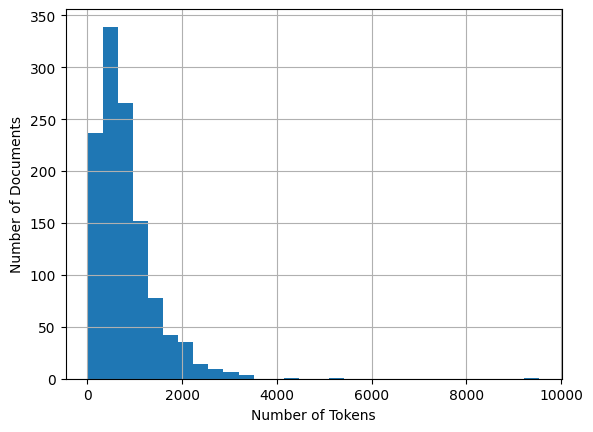

In [16]:
## YOUR CODE HERE
df['total_tokens'].hist(bins=30)
plt.xlabel('Number of Tokens')
plt.ylabel('Number of Documents')
plt.show()
## Plot the distribution of the number of tokens per document

In [25]:
## 1a. What is the longest article?
df.loc[df['total_tokens'].idxmax()]

#the longest is "women have been misled about menopause" from NYT

source                                                     nytimes
title            Women Have Been Misled About Menopause - The N...
text             Credit...Marta Blue for The New York Times\nSe...
tokens           [Credit, ..., Marta, Blue, for, The, New, York...
total_tokens                                                  9533
unique_tokens                                                 2094
Name: 10016, dtype: object

In [26]:
## 1b. What is the shortest article?
df.loc[df['total_tokens'].idxmin()]

#the shortest is "the GOP is just obnoxious" from realclearpolitics

source                                           realclearpolitics
title                The GOP Is Just Obnoxious | RealClearPolitics
text             The GOP Is Just Obnoxious\nDavid Frum , The At...
tokens           [The, GOP, Is, Just, Obnoxious, \n, David, Fru...
total_tokens                                                    16
unique_tokens                                                   13
Name: 10037, dtype: object

In [27]:
## 1c. What is the 95th percentile of the number of tokens per document?
## Hint: use np.percentile
#i will use the pandas method 'quantile'
df['total_tokens'].quantile(0.95)

#95th percentile is 1979.8 tokens in a document

1979.8

In [38]:
import string
from collections import Counter
## 1d. What is the size of the vocabulary and the frequencies of each token in the corpus?
#perhaps i misunderstood an earlier question, but the frequency of each token in the corpus is found in the previously written:
token_counts = Counter(all_tokens)


## Create list of stopwords from spacy
stop_words = list(spacy.lang.en.stop_words.STOP_WORDS) + list(string.punctuation)
stop_words.extend(['\n', '”', '“']) #i noticed that these are our most common tokens, and think they really should be removed with the stops

#lets remove stopwords from our dict of token_counts, and then order in descending order to look at the most commonly used words
for word in list(token_counts):
    if word.lower() in stop_words:
        del token_counts[word]

sorted_token_counts = dict(sorted(token_counts.items(), key=lambda item: item[1], reverse=True))
sorted_token_counts
#a lot of news is about Biden or the House!!

{'said': 4570,
 'Biden': 2882,
 '—': 2545,
 'House': 1948,
 'Advertisement': 1639,
 'story': 1632,
 'continues': 1420,
 '\xa0': 1372,
 'Trump': 1359,
 '2023': 1273,
 'time': 1179,
 '’': 1146,
 'year': 1131,
 'people': 1053,
 'new': 1044,
 'like': 1011,
 'president': 998,
 'President': 977,
 'according': 965,
 'Ukraine': 963,
 'Republicans': 892,
 'New': 885,
 'Tuesday': 885,
 'White': 873,
 'McCarthy': 849,
 'Republican': 819,
 'Wednesday': 804,
 'years': 802,
 'state': 790,
 '1': 758,
 'Mr.': 729,
 'public': 725,
 'American': 718,
 'Russia': 713,
 'January': 711,
 'told': 688,
 'government': 667,
 'debt': 649,
 'percent': 644,
 'News': 643,
 'police': 642,
 'Ukrainian': 640,
 'R': 617,
 'U.S.': 614,
 'Rep.': 598,
 'DeSantis': 596,
 'country': 594,
 '‘': 588,
 'news': 587,
 'including': 585,
 'officials': 583,
 'CNN': 582,
 'GOP': 581,
 'week': 572,
 'Florida': 560,
 'Russian': 559,
 'meeting': 544,
 'Black': 534,
 'think': 532,
 'data': 531,
 'York': 528,
 'work': 524,
 'Committee': 5

## 2.0 How many different sources are there in the corpus?

Please describe how many different sources exist in the dataset.

In [40]:
## 2a. Plot how many different sources are there in the corpus?
print(df['source'].unique())
print(len(df['source'].unique()))
# there are twenty unique sources, as listed below

['politicususa' 'vox' 'huffpost' 'msnbc' 'nytimes' 'washingtonpost' 'cnn'
 'politico' 'abcnews.go' 'thehill' 'realclearpolitics'
 'realclearmarkets.com' 'foxnews' 'dailycaller' 'westernjournal'
 'breitbart' 'thegatewaypundit' 'washingtonexaminer' 'checkyourfact.com'
 'politico.eu']
20


Text(0, 0.5, 'Number of Articles')

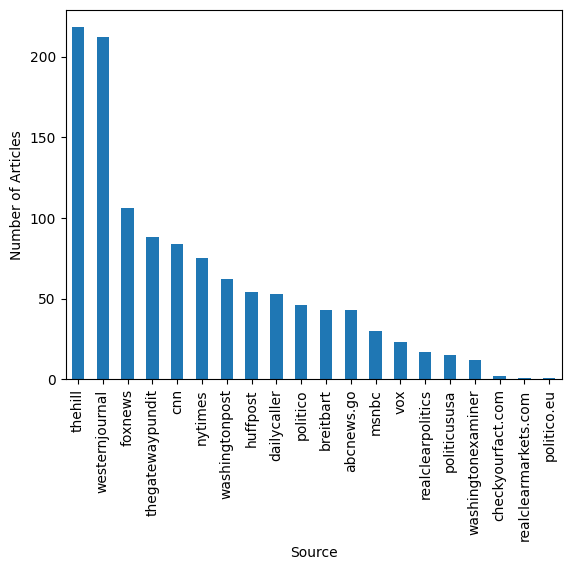

In [42]:
## 2b. Plot the distribution of articles per source?
## hint: use seaborn boxplot
source_counts = df['source'].value_counts()

# plot a bar chart of the source counts
source_counts.plot(kind='bar')
plt.xlabel('Source')
plt.ylabel('Number of Articles')
## YOUR CODE HERE